<h1> LZ Discrimination Calculator </h1> <h3> S1 from 0 to 20 phd </h3>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyNEST import *
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#WS cuts
S1_min=0
S1_max=20
S2raw_min=450
#NS1_coin_req=3

In [7]:
g1s=[0.05,0.075,0.12]
drift_fields=[50,160,290,630]
discrim=np.zeros((size(g1s),size(drift_fields)))
discrim_gauss=np.zeros((size(g1s),size(drift_fields)))

##############################################################################
#Generate Flat ER and NR spectra:
##############################################################################
#LZ

for ii, g1 in enumerate(g1s):
    for jj, df in enumerate(drift_fields):
        NEST=NEST_setup(g1=g1,f_drift=df,custom=True)
        S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, std_S2oS1_e, \
        E_bin_cen_e, Eff_e, E_bin_cen_n, Eff_n, num_leak_e, num_total_e, leak_gauss_e, sNR \
        = genBands(NEST=NEST,S2raw_min=S2raw_min,nSim=2e6) #change to 1e5 to speed up

        #calculate NR ER discrimination
        leak_cut= S1_bin_cen_e<S1_max
        discrim[ii,jj]=100*(1-sum(num_leak_e[leak_cut])/sum(num_total_e[leak_cut]))
        discrim_gauss[ii,jj]=100*(1-mean(leak_gauss_e[leak_cut]))
        
        print (g1,df,discrim[ii,jj],discrim_gauss[ii,jj])

(0.05, 50, 99.369853146810939, 99.437791531134508)
(0.05, 160, 99.620189944509036, 99.602162310755872)
(0.05, 290, 99.699264243203999, 99.608571201628621)
(0.05, 630, 99.697400237708166, 99.416768119506827)
(0.075, 50, 99.415552099533429, 99.509407561335848)
(0.075, 160, 99.614163252546192, 99.662001649464827)
(0.075, 290, 99.695360513264632, 99.688616984547579)
(0.075, 630, 99.720985455624813, 99.519786120067835)
(0.12, 50, 99.635171790235077, 99.692831729947486)
(0.12, 160, 99.74007135649417, 99.784070570650883)
(0.12, 290, 99.777076208735494, 99.80392913633203)
(0.12, 630, 99.816560939760606, 99.714020766554071)


In [8]:
discrim_gauss

array([[ 99.43779153,  99.60216231,  99.6085712 ,  99.41676812],
       [ 99.50940756,  99.66200165,  99.68861698,  99.51978612],
       [ 99.69283173,  99.78407057,  99.80392914,  99.71402077]])

<h1> Plot discrimnation </h1>

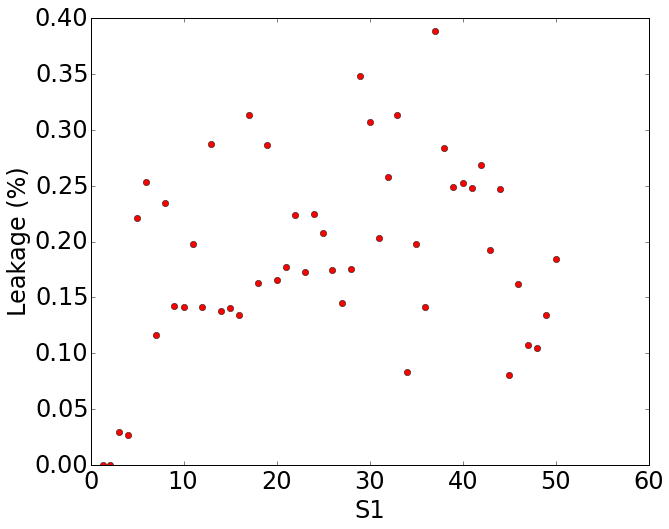

In [5]:
plot(S1_bin_cen_e,100*(num_leak_e/num_total_e),'or')
xlabel('S1')
ylabel('Leakage (%)')

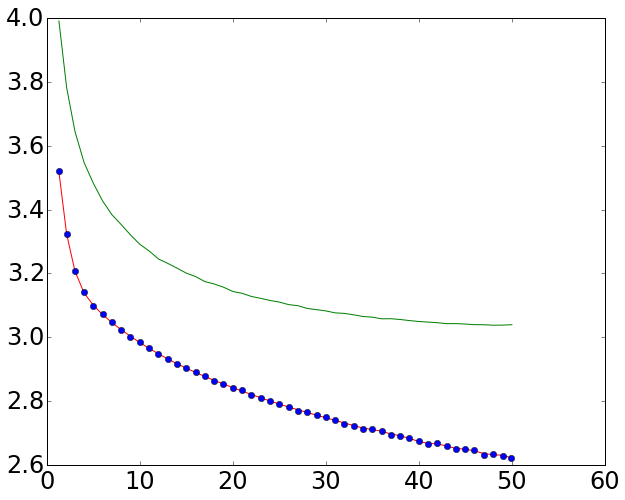

In [6]:
#Plot ER, NR mean and NR interpolation

#sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.002)

plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'r')
plot(S1_bin_cen_n,mean_S2oS1_n,'o')
plot(S1_bin_cen_e,mean_S2oS1_e)

In [5]:
nsig=(2-1)/1
sp.special.erfc(nsig/sqrt(2))/2

0.15865525393145707

<h1> Plot Discrimination vs. WIMP mass </h1>

In [ ]:
mWmp=np.logspace(1.3,3,10)
discrim=np.zeros_like(mWmp)
discrim_gauss=np.zeros_like(mWmp)

##############################################################################
#Generate Flat ER and NR spectra for given WIMP mass:
##############################################################################
#LZ
NEST=NEST_setup() #defults to LZ nominal parameters

for ii, mW in enumerate(mWmp):
    S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, std_S2oS1_e, \
    E_bin_cen_e, Eff_e, E_bin_cen_n, Eff_n, num_leak_e, num_total_e, leak_gauss_e, sNR \
    = genBands(NEST=NEST,S2raw_min=S2raw_min,nSim=1e8,mWmp=mW) #change to 1e5 to speed up

    #calculate NR ER discrimination
    leak_cut= S1_bin_cen_e<S1_max
    discrim[ii]=100*(1-sum(num_leak_e[leak_cut])/sum(num_total_e[leak_cut]))
    discrim_gauss[ii]=100*(1-mean(leak_gauss_e[leak_cut]))
    
    print (mW,discrim_gauss[ii])

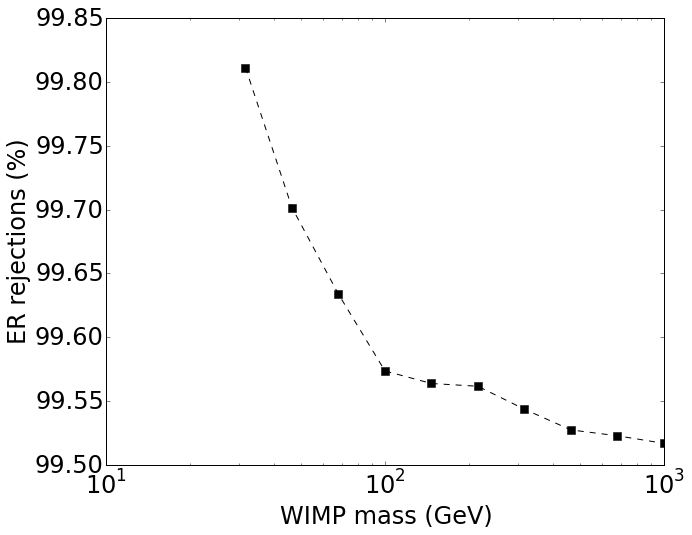

In [12]:
plt.plot(mWmp,discrim,'--sk',markersize=8)
xscale('log')
xlabel('WIMP mass (GeV)')
ylabel('ER rejections (%)')

savefig('figs/Discrim.png')